# <span style="color:darkblue"> Lecture 16: Classification Metrics </span>

<font size = "5">

In this lecture we will learn more about Support <br>
Vector Machines (SVM). We will start the class with a short video:

 https://www.youtube.com/watch?v=_YPScrckx28

 https://www.youtube.com/watch?v=Q7vT0--5VII

 <font size = "5">

 In this lecture we will emphasize:
 - A new method SVM
 - Importance of scaling data
 - How to obtain performance metrics
 - How to tune parameters

# <span style="color:darkblue"> I. Setup Working Environment </span>


<font size = "5">

We will be using the API of the University of California <br>
Irving Machine Learning Repository

In Windows (Anaconda Prompt) or Mac (Terminal) type:

``` pip install ucimlrepo ```

https://archive.ics.uci.edu

In [2]:
pip install ucimlrepo

Looking in indexes: https://mirrors.bfsu.edu.cn/pypi/web/simple
    Django (>4.0.0=)
           ~~~~~~~^
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import the package for the University of California Irvine API
from ucimlrepo import fetch_ucirepo 

# Import SK-Learn library for machine learning functions
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.metrics import get_scorer_names


# Import standard data analysis packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# <span style="color:darkblue"> II. Data </span>

<font size = "5">

Online Shoppers Purchasing Intention Dataset (OSHPID)

- This dataset contains information about user sessions
- It contains features data about user behavior 
while <br> navigating website
- The goal is to predict whether the customer will purchase or not


https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset


网上购物者购买意向数据集（OSHPID）

—该数据集包含用户会话信息
—包含用户行为的特征数据
当<br>浏览网站时
-目标是预测客户是否会购买

In [4]:
# Fetch online data from the UC Irvine Machine Learning Repository API
online_shopping= fetch_ucirepo(id=468) 

# Extract
X = online_shopping.data.features
# Drop columns that contain non-numeric values
X = X.drop(columns = ["Month","VisitorType"])

# Extract label data
y = online_shopping.data.targets["Revenue"]


<font size = "5">

Total size of dataset

In [5]:
# Compute total numbers or rows
print(len(y))
print(len(X))

12330
12330


<font size = "5">

Extract column names

- Check separately in VS-Code Data Viewer

In [6]:
dataset_names = pd.DataFrame(X.columns)

<font size = "5">

Obtain table of proportions for outcome

- 0 if the customer did not purchase product
- 1 if the customer purchase the product

In [7]:
# Compute frequency table for label
table_y = pd.crosstab(y,"Purchased ?") / len(y)
display(table_y)

col_0,Purchased ?
Revenue,
False,0.845255
True,0.154745


<font size = "5">

Obtain Basic Descriptive Statistics of features

In [8]:
# Compute table of descriptive statistics for features
display(X.describe())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


<font size = "5">

Split into training and test data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True) 

<font size = "5">

For many ML problems it is useful to scale the data

<font size = "3">

- Preprocessing ensures that the data has mean zero and unit variance
- A lot of things related to sc-learn use a function structure
    -  You start by defining a "scaler" function which computes <br>
    the mean and variance.
    - Then the "scaler" function is applied to the corresponding dataset
    - It is important to compute a separate scalar for the training <br>
    and test data to avoid "contaminating" the data

<字体大小= " 5 " >

对于许多ML问题，扩展数据是有用的

<字体大小= " 3 " >

-预处理确保数据具有平均零和单位方差
-许多与科学学习相关的东西都使用功能结构
-首先定义一个“标量”函数，该函数计算<br>
均值和方差。
-然后将“scaler”函数应用于相应的数据集
-为训练计算单独的标量是很重要的<br>
并测试数据以避免“污染”数据

In [10]:
# The first step is to produce a "scaler" function
scaler_train = preprocessing.StandardScaler().fit(X_train)
scaler_test  = preprocessing.StandardScaler().fit(X_test)

# Apply scaler function
X_train_scale = scaler_train.transform(X_train)
X_test_scale  = scaler_test.fit(X_test).transform(X_test)

# <span style="color:darkblue"> III. Support Vector Machinees (SVMs) </span>

<font size = "5">

One of the most popular methods of classifcation are SVMs


<font size = "5">

https://scikit-learn.org/stable/modules/svm.html#svm-classification
https://en.wikipedia.org/wiki/Support_vector_machine


<font size = "3">

- The default regularization parameter is $C = 1$
- The default kernel curvature parameter is  $gamma = 1/(\# features)$


—默认正则化参数为$C = 1$
-默认的内核曲率参数是$gamma = 1/(\# features)$

In [11]:
svm = SVC()
svm.fit(X_train_scale, y_train)

SVC()

In [12]:
X_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
7645,4,23.533333,0,0.0,10,118.000000,0.011111,0.066667,0.000000,0.0,2,2,2,3,True
141,0,0.000000,0,0.0,9,272.500000,0.000000,0.011852,0.000000,0.2,1,1,6,3,False
6801,1,0.000000,0,0.0,1,74.600000,0.100000,0.100000,0.000000,0.0,3,2,1,4,False
367,1,11.888889,0,0.0,111,3510.879903,0.000098,0.009438,12.016565,0.0,3,2,5,2,False
5815,16,391.683333,0,0.0,24,443.750000,0.000000,0.006452,0.000000,0.0,2,10,7,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,9,103.933333,0,0.0,16,172.133333,0.012000,0.049000,0.000000,0.0,1,1,1,2,False
8846,0,0.000000,3,1830.5,81,5000.739116,0.003294,0.020433,0.000000,0.0,2,2,3,2,True
729,0,0.000000,0,0.0,15,1148.000000,0.014286,0.050000,0.000000,0.0,3,2,1,3,False
5825,2,15.200000,0,0.0,22,244.200000,0.027273,0.063636,0.000000,0.0,2,2,7,1,True


<font size = "5">

Out-of-sample predictions

In [13]:
predictions = svm.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(



<font size = "5">

Confusion Matrix with SK-Learn


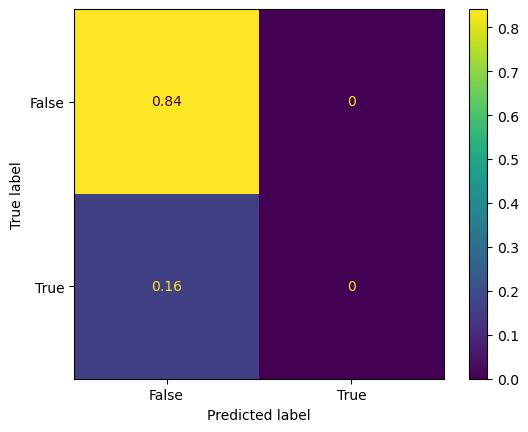

In [14]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions, labels=svm.classes_) / len(y_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=svm.classes_)
disp.plot()
plt.show()

<font size = "5">

Try it yourself!

<font size = "3">

- What if you do not scale the features?
- Compute the confusion matrix for the SVM model without rescaling

Note:
- Often variables have very different scales
- Machine learning models such as SVM use notions of proximity 
- With heterogeneous variances, certain features will end up getting more
weight 
- Standardization helps puts the variables on equal footing

-如果你不扩展功能怎么办？
—在不重新缩放的情况下计算SVM模型的混淆矩阵

注意:
-变量通常有非常不同的尺度
-机器学习模型，如SVM使用接近的概念
-在异质方差下，某些特性最终会得到更多
重量
-标准化有助于将变量置于平等地位

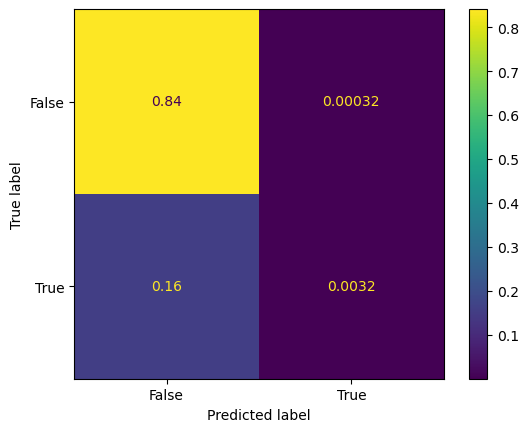

In [28]:
# Write your own code

svm = SVC()
svm.fit(X_train, y_train)

predictions = svm.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions, labels=svm.classes_) / len(y_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=svm.classes_)
disp.plot()
plt.show()



# <span style="color:darkblue"> III. Performance and Decision Thresholds </span>

3。性能和决策阈值

<font size = "5">

There are many possible performance metrics

(see textbook for more details)

有许多可能的性能度量

In [16]:
list_scorers =  pd.DataFrame(get_scorer_names())
list_scorers

,0
0,accuracy
1,adjusted_mutual_info_score
2,adjusted_rand_score
3,average_precision
4,balanced_accuracy
5,completeness_score
6,d2_absolute_error_score
7,explained_variance
8,f1
9,f1_macro


<font size = "5">

Obtain some of these metrics via cross-validation

- This usually takes a while to compute

通过交叉验证获得其中一些指标

-这通常需要一些时间来计算

In [32]:
# Scoring sets the variables that you want to compute
res = cross_validate(SVC(), X_train_scale, y_train,
                     scoring=["accuracy", "roc_auc", "recall_macro"],
                     return_train_score=False, cv=5)
display(pd.DataFrame(res))

,fit_time,score_time,test_accuracy,test_roc_auc,test_recall_macro
0,2.346843,1.240170,0.886486,0.846869,0.719641
1,2.366220,1.237755,0.892432,0.862575,0.721712
2,2.424676,1.270812,0.903191,0.854618,0.732961
3,2.415416,1.243596,0.898864,0.873559,0.725535
4,2.351673,1.236680,0.894538,0.826146,0.727303


<font size = "5">

Summarize results across folds

In [33]:
pd.DataFrame(res).mean()

fit_time             2.380965
score_time           1.245803
test_accuracy        0.895102
test_roc_auc         0.852754
test_recall_macro    0.725430
dtype: float64

<font size ="5">

Try it yourself!

Try obtaining other performance metrics
 

In [35]:
# Write your own code
svc_model = SVC(probability=True)
res1 = cross_validate(SVC(), X_train_scale, y_train,
                     scoring=["neg_brier_score", "neg_log_loss", "top_k_accuracy"],
                     return_train_score=False, cv=5)
display(pd.DataFrame(res1))

AttributeError: SVC has none of the following attributes: predict_proba.

In [36]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
import pandas as pd

# Enable probability estimates in SVC
svc_model = SVC(probability=True)

# Perform cross-validation with specified scoring metrics
res1 = cross_validate(svc_model, X_train_scale, y_train,
                      scoring=["neg_brier_score", "neg_log_loss", "top_k_accuracy"],
                      return_train_score=False, cv=5)

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(res1)
display(results_df)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:2025: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:2025: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:2025: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:2025: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:2025: UndefinedMe

,fit_time,score_time,test_neg_brier_score,test_neg_log_loss,test_top_k_accuracy
0,12.399392,1.229343,-0.088339,-0.305296,1.0
1,12.338104,1.246752,-0.084082,-0.292489,1.0
2,12.561562,1.256414,-0.078589,-0.281276,1.0
3,12.564267,1.241514,-0.078601,-0.278473,1.0
4,12.423955,1.266580,-0.085136,-0.298991,1.0


# <span style="color:darkblue"> IV. Tuning by Cross Validation </span>


<font size = "5">

Manually create a grid of values for tuning

<font size = "3">

- Initially we will run this with a single training-test pair
- For computational ease we just try two parameters <br>
on the grid, but in a real application we may want more

<字体大小= " 5 " >

手动创建用于调优的值网格

<字体大小= " 3 " >

-最初我们将运行一个单一的训练测试对
-为了计算方便，我们只尝试两个参数<br>
在网格上，但在实际应用程序中，我们可能需要更多

In [20]:
k_features = X.shape[1]
k_features

15

In [21]:
k_features = X.shape[1]

best_score = 0

for gamma in [0.1/(k_features), 1/(k_features)]:   
    for C in [0.1, 1]:
        # Add a message to know the progress of the algorithm  添加消息以了解算法的进度
        print("Evaluating - gamma: "+str(gamma)+"  - C: "+str(C))
        # for each combination of parameters, train an SVC 对于每一个参数组合，训练一个SVC
        svm.fit(X_train_scale, y_train)
        # evaluate the SVC on the test set 评估测试集上的SVC
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters 如果我们得到一个更好的分数，存储分数和参数
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print(best_parameters)

Evaluating - gamma: 0.006666666666666667  - C: 0.1


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Evaluating - gamma: 0.006666666666666667  - C: 1


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Evaluating - gamma: 0.06666666666666667  - C: 0.1


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Evaluating - gamma: 0.06666666666666667  - C: 1


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


{'C': 0.1, 'gamma': 0.006666666666666667}


<font size = "5">

Estimate optimal model on all data

In [39]:

# rebuild a model on the combined training and validation set
# **best_parameters enters the dictionary format

svm = SVC(**best_parameters)
svm.fit(X_train_scale, y_train)

SVC(C=0.1, gamma=0.006666666666666667)

<font size ="5">

Obtain confusion matrix

获得混淆矩阵

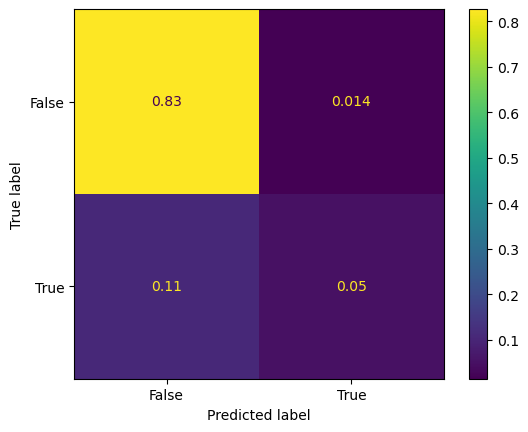

In [40]:
# Obtain predictions
predictions = svm.predict(X_test_scale)

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions, labels=svm.classes_) / len(y_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=svm.classes_)
disp.plot()
plt.show()

<font size = "5">

Create a grid of parameters
创建一个参数网格

In [24]:
param_grid = {'C': [ 0.01, 0.1],
              'gamma': [0.01/(k_features), 0.1/(k_features)]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.01, 0.1], 'gamma': [0.0006666666666666666, 0.006666666666666667]}


<font size = "5">

Create configuration object for grid <br>
usng K-Fold cross-valdaton

- We set the number of folds "cv" to 2 for speed <br>
but in real applications you may want to have a larger <br>
number such as 5 so that the training set has more <br>
observations.

为网格<br>创建配置对象
使用K-Fold交叉验证

-我们将折叠次数“cv”设置为2，以提高速度<br>
但在实际应用中，你可能需要更大的<br>
例如5，这样训练集有更多的<br>
观察。

K折交叉验证：
5折交叉验证（K=5）会将数据分为5份，每次用1份数据做验证集，剩余4份做训练集，最后平均5次的验证得分。

In [25]:
grid_search = GridSearchCV(SVC(), param_grid, cv=2,
                          return_train_score=True,
                          n_jobs = -1)

In [26]:
# Execute grd search

grid_search.fit(X_train_scale, y_train)

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1],
                         'gamma': [0.0006666666666666666,
                                   0.006666666666666667]},
             return_train_score=True)

<font size = "5">

Try it yourself!

- Create a grid for random forests on this dataset, <br>
varying the numbers of forests, i.e. the  argument <br>
```n_estimators``` in the random forest classifier.
- To keep the code from taking too long, <br>
try with 10 trees and 50 trees.

<字体大小= " 5 " >

你自己试试吧！

在这个数据集上为随机森林创建一个网格，<br>
改变森林的数量，例如<br>
‘ ’ n_estimators ' ' ‘ ’在随机森林分类器中。
-为了避免代码花费太长时间，<br>
尝试10棵树和50棵树。

In [37]:
# Write your own code


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Define the parameter grid  定义参数网格
param_grid = {'n_estimators': [10, 50]}

# Initialize the random forest classifier  初始化随机森林分类器
rf = RandomForestClassifier(random_state=42)

# Set up grid search with cross-validation  设置网格搜索与交叉验证
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search on the training data  对训练数据进行网格搜索拟合
grid_search.fit(X_train_scale, y_train)

# Display the results  显示结果
results_df = pd.DataFrame(grid_search.cv_results_)
display(results_df)



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.099995,0.015198,0.003304,0.000072,10,{'n_estimators': 10},0.881622,0.884865,0.904813,0.899405,0.889129,0.891967,0.008785,2
1,0.438833,0.008228,0.012522,0.000350,50,{'n_estimators': 50},0.890270,0.897297,0.904273,0.905895,0.898323,0.899212,0.005562,1
